# 2. Time Series Graphs

## 2.1 Time Plots

- Time Plot: these are obs are plotted against time of observation, with consecutive obs joined by straight line

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.getcwd()

'/Users/saajanrajak/2024 Projects/2024_05 Machine Learning/Hands on ML Geron'

In [7]:
os.chdir('/Users/saajanrajak/2024 Projects/2024_05 Machine Learning/Data/')
os.getcwd()

'/Users/saajanrajak/2024 Projects/2024_05 Machine Learning/Data'

In [8]:
ansett_df = pd.read_csv('Total_weekly_air_psngr_on_Ansett_airline_1987_92.csv')

In [12]:
drug_df = pd.read_csv('a10_antidiabetic_drug_sales_australia_1992_2008.csv')

In [2]:
print(ansett_df.shape)
ansett_df.head()

(176, 5)


,Unnamed: 0,X,First.Class,Business.Class,Economy.Class
0,108,108,1.636,1.524,19.260
1,109,109,1.741,2.212,18.781
2,110,110,1.597,1.777,17.445
3,111,111,1.943,2.552,19.628
4,112,112,1.660,1.889,17.692


In [3]:
ansett_df.describe()

,Unnamed: 0,X,First.Class,Business.Class,Economy.Class
count,176.000000,176.000000,176.000000,176.000000,176.000000
mean,195.500000,195.500000,1.104869,2.213136,21.338273
std,50.950957,50.950957,0.458534,1.863777,6.321500
min,108.000000,108.000000,0.000000,0.000000,0.000000
25%,151.750000,151.750000,0.833750,1.532250,19.018500
50%,195.500000,195.500000,1.149500,1.874000,21.147000
75%,239.250000,239.250000,1.408750,2.231000,26.416000
max,283.000000,283.000000,2.366000,10.433000,32.468000


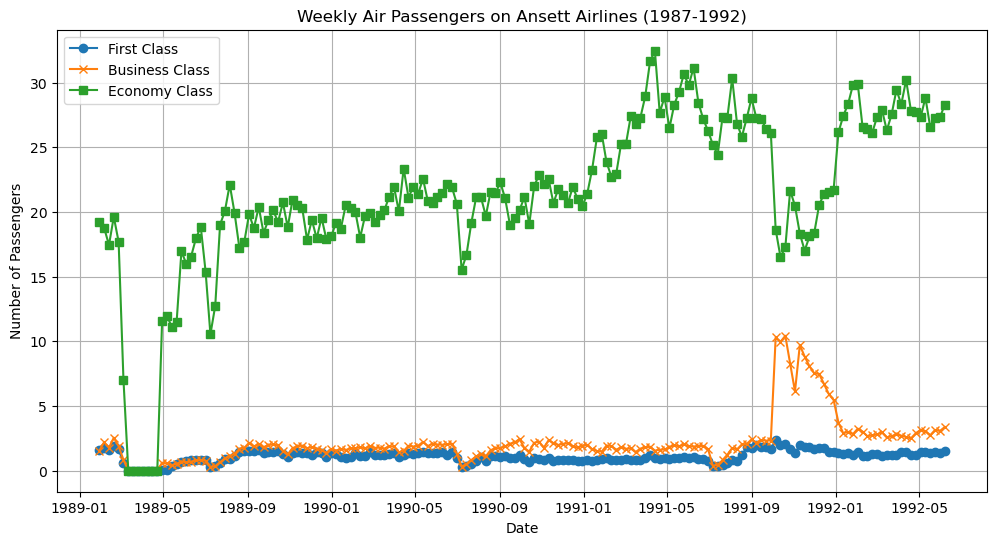

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Assuming week 108 corresponds to the first week of 1987
# Create a date range starting from the 108th week of 1987
start_date = pd.to_datetime('1987-01-01') + pd.DateOffset(weeks=108)
dates = pd.date_range(start=start_date, periods=len(ansett_df), freq='W')

# Assign this date range to the dataframe for plotting
ansett_df['Date'] = dates

# Plot the time series data using the newly created Date column
plt.figure(figsize=(12, 6))

# Plot First Class passengers
plt.plot(ansett_df['Date'], ansett_df['First.Class'], label='First Class', marker='o')

# Plot Business Class passengers
plt.plot(ansett_df['Date'], ansett_df['Business.Class'], label='Business Class', marker='x')

# Plot Economy Class passengers
plt.plot(ansett_df['Date'], ansett_df['Economy.Class'], label='Economy Class', marker='s')

# Add labels and title
plt.title('Weekly Air Passengers on Ansett Airlines (1987-1992)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [5]:
start_date

Timestamp('1989-01-26 00:00:00')

In [6]:
dates

DatetimeIndex(['1989-01-29', '1989-02-05', '1989-02-12', '1989-02-19',
               '1989-02-26', '1989-03-05', '1989-03-12', '1989-03-19',
               '1989-03-26', '1989-04-02',
               ...
               '1992-04-05', '1992-04-12', '1992-04-19', '1992-04-26',
               '1992-05-03', '1992-05-10', '1992-05-17', '1992-05-24',
               '1992-05-31', '1992-06-07'],
              dtype='datetime64[ns]', length=176, freq='W-SUN')

In [15]:
drug_df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [14]:
drug_df['date'] = pd.to_datetime(drug_df['date'])

Text(0, 0.5, '$ Millions')

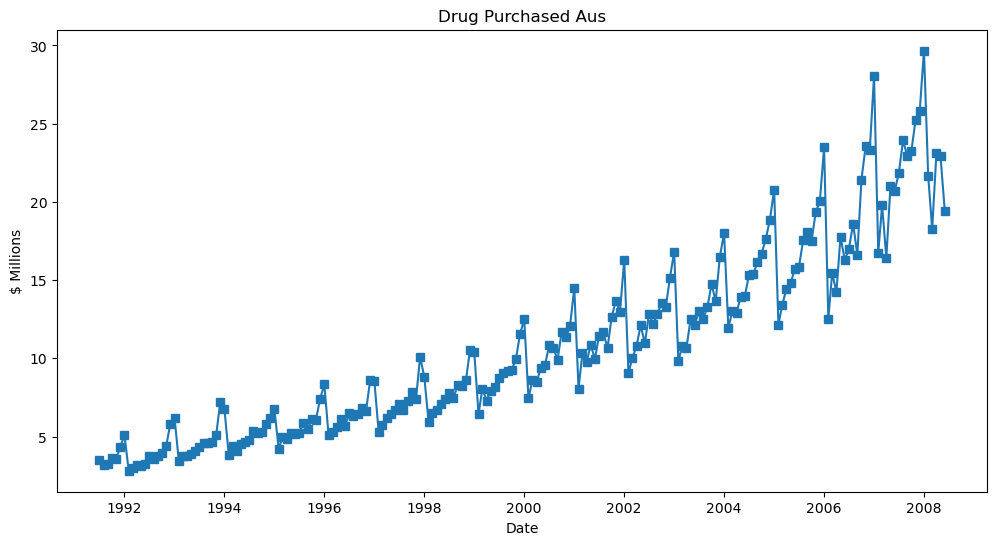

In [19]:
plt.figure(figsize = (12,6))
plt.plot(drug_df['date'], drug_df['value'], marker = 's')

# map title  lenged,labels
plt.title('Drug Purchased Aus')
plt.xlabel('Date')
plt.ylabel('$ Millions')

- here we can see clear and increasing trend.
- there is also strong seasonal pattern, that increases as the level of series increases

## 2.3 Time series Patterns

#### Main Components of a time series are

- **Trend**: The overall direction of the data over a long period of time (increasing, decreasing, or stable).
  - A trend shows the long-term progression in the data.
- **Seasonality**: Regular and predictable patterns that repeat over a specific period (such as daily, monthly, or yearly). 
  - These fluctuations are caused by seasonal factors (e.g., holidays, weather).
- **Cyclical Component**: Long-term fluctuations or oscillations in the data that are not of a fixed period but occur over longer durations. 
  - These cycles usually correspond to economic or business cycles.
- **Irregular/Random Component** :Unpredictable, random variations in the data caused by unforeseen events or noise. 
  - This is the residual variation that cannot be explained by trend, seasonality, or cyclical components
  
#### summary

- Trend: Long-term movement.
- Seasonality: Regular patterns.
- Cyclical: Long-term oscillations.
- Irregular: Random, unpredictable variations.

## 2.4 Seasonal Plots


- Seasonal plots are a way to visualize seasonality in time series data by plotting the data points according to their periodicity (e.g., by month, quarter, or day).
- They help to reveal underlying patterns and cyclical behaviors in the data

## 2.5 Seasonal Sub Series Plots

- A seasonal subseries plot is a useful way to visualize the seasonal patterns within time series data. 
- **It displays multiple small plots (subplots) for each season, helping to compare how values change across different seasons over multiple years**. 
- This is particularly effective for identifying trends, cycles, and seasonal effects in the data.

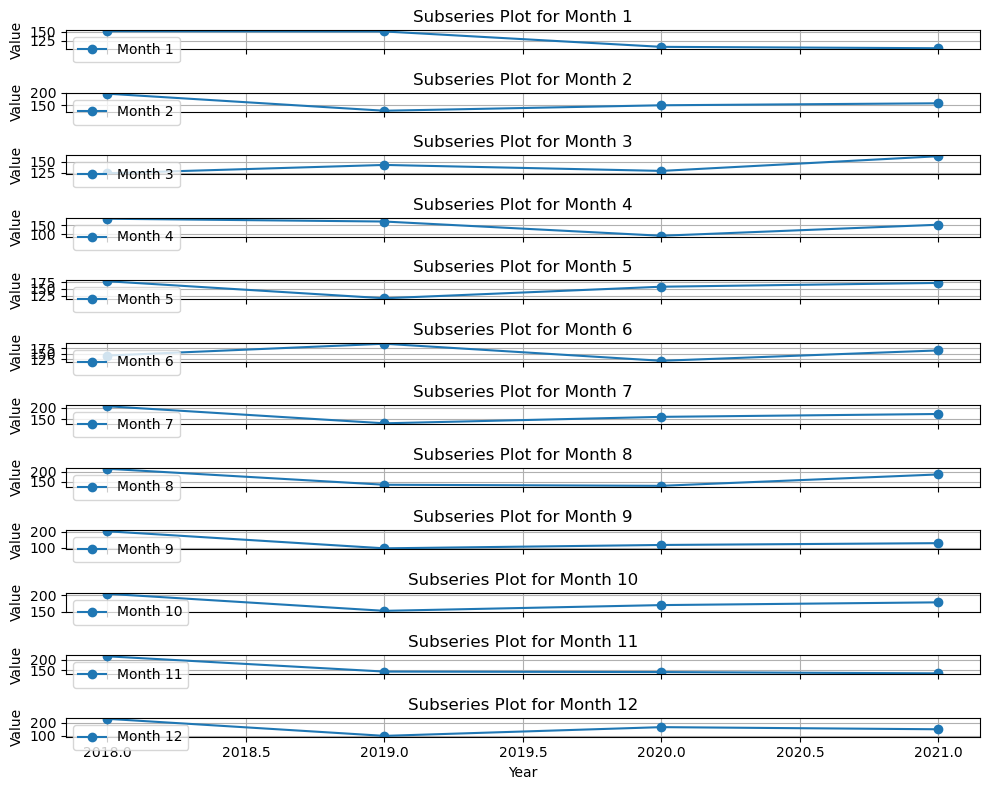

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data: creating a time series with monthly frequency
date_range = pd.date_range(start='2018-01-01', end='2021-12-31', freq='M')
np.random.seed(42)
values = np.random.randint(100, 200, size=len(date_range)) + (np.sin(np.arange(len(date_range)) / 6) * 30)  # Adding some seasonal effect
data = {'date': date_range, 'value': values}

# Creating the DataFrame
drug_df = pd.DataFrame(data)

# Ensure 'date' is in datetime format
drug_df['date'] = pd.to_datetime(drug_df['date'])

# Extracting year and month for subseries plotting
drug_df['year'] = drug_df['date'].dt.year
drug_df['month'] = drug_df['date'].dt.month

# Create a figure for the subseries plot
months = drug_df['month'].unique()
num_months = len(months)
fig, axes = plt.subplots(nrows=num_months, ncols=1, figsize=(10, 8), sharex=True)

# Create subseries plot
for month in months:
    ax = axes[month - 1]  # Month - 1 for zero-based index
    month_data = drug_df[drug_df['month'] == month]
    ax.plot(month_data['year'], month_data['value'], marker='o', label=f'Month {month}')
    ax.set_title(f'Subseries Plot for Month {month}')
    ax.set_ylabel('Value')
    ax.legend(loc='upper left')
    ax.grid()

plt.xlabel('Year')
plt.tight_layout()
plt.show()


## 2.6 Scatteplots in Timeseries

- A scatter plot is a great way to visualize the relationship between two variables in a time series context.
- While line plots show trends over time, scatter plots can help to identify correlations, clusters, and the distribution of data points.

#### -- -- -- -- --

- Scaterplot Matrix for a timeseries also helps in visualing the patterns

## 2.7 Lag Plots

- Lag plots are a useful diagnostic tool in time series analysis that help visualize the relationship between a time series and a lagged version of itself. 
- They are particularly helpful in identifying patterns, trends, and the presence of autocorrelation in your data.
- For instance, in a lag plot with a lag of 1, each point on the x-axis represents the value of the time series at time t, and the y-axis represents the value of the time series at time t−1.


#### -- -- -- -- --
**Why Use Lag Plots?** 
 - **Identify Autocorrelation**: Lag plots can help determine if the time series data is correlated with its past values. If points in the plot show a pattern (e.g., clustering along a diagonal line), it indicates the presence of autocorrelation.
- **Modeling Insights**: Understanding lag relationships can provide insights into which lags might be significant when building predictive models, such as ARIMA or other time series models.

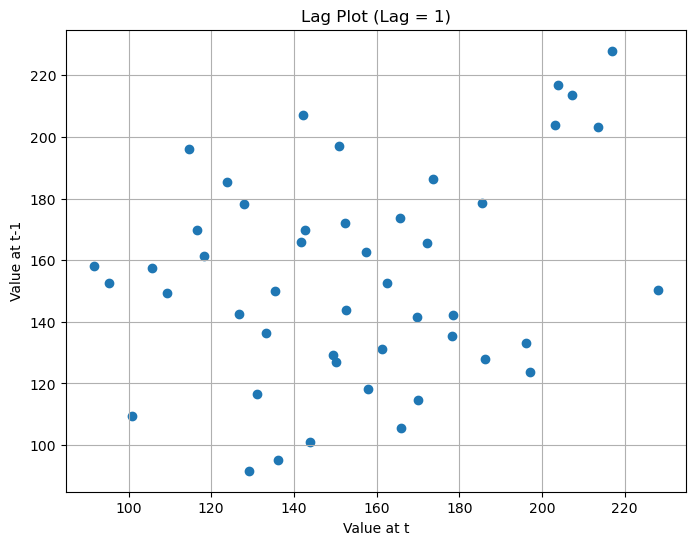

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Generate sample time series data
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', periods=100)
data = np.random.randn(100).cumsum()  # Cumulative sum to create a trend

# Create a DataFrame
time_series_data = pd.DataFrame({'date': drug_df['date'], 'value': drug_df['value']})
time_series_data.set_index('date', inplace=True)

# Create a lag plot for lag = 1
plt.figure(figsize=(8, 6))
lag_plot(time_series_data['value'], lag=1)
plt.title('Lag Plot (Lag = 1)')
plt.xlabel('Value at t')
plt.ylabel('Value at t-1')
plt.grid()
plt.show()


<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

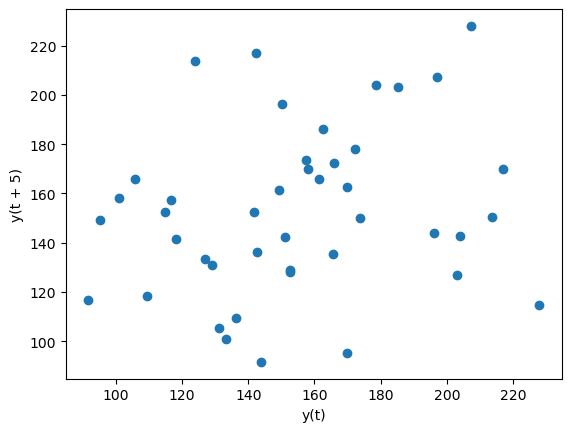

In [38]:
lag_plot(time_series_data['value'], lag=5)

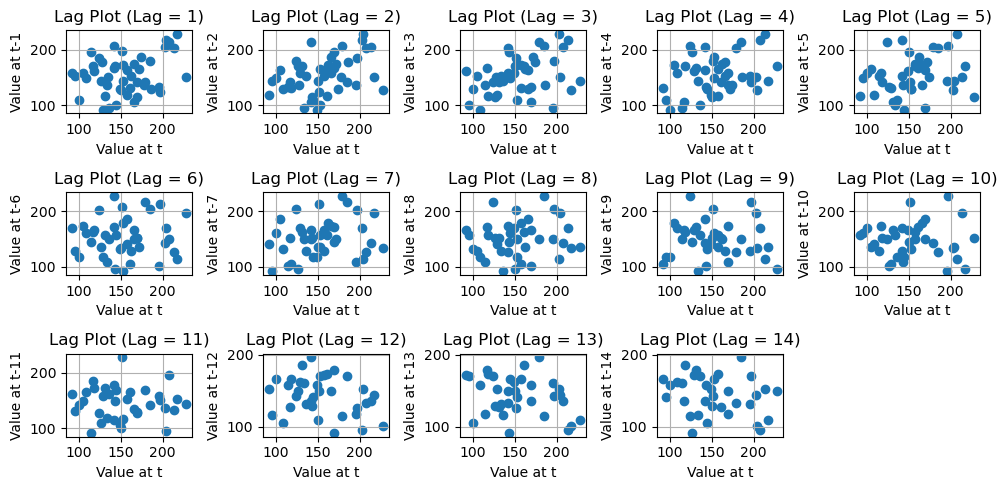

In [52]:
# Create lag plots for lags from 1 to 11
lags = range(1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5))
axes = axes.flatten()  # Flatten the array of axes for easy indexing

for i, lag in enumerate(lags):
    ax = axes[i]
    lag_plot(time_series_data['value'], lag=lag, ax=ax)
    ax.set_title(f'Lag Plot (Lag = {lag})')
    ax.set_xlabel('Value at t')
    ax.set_ylabel(f'Value at t-{lag}')
    ax.grid()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Analyzing Lag Plots**
- **When interpreting lag plots**
  - **Diagonal Patterns**: If the points cluster along a diagonal line (positive slope), it indicates positive autocorrelation. If they cluster along a diagonal line with a negative slope, it indicates negative autocorrelation.
  - **Random Scatter**: If the points are randomly scattered, it suggests little to no autocorrelation, implying that past values do not predict future values

### -- -- -- -- --
**Lag plots are a powerful visualization tool for time series analysis, especially for understanding the autocorrelation structure of the data. Here's a deeper dive into how lag plots guide model selection for time series forecasting**:

##### x1. Identifying Autocorrelation

**Autocorrelation** measures how current values in a time series relate to its past values. Lag plots help visualize this relationship:

- **Positive Autocorrelation**: If points in a lag plot cluster along a positive diagonal line, it suggests that high values tend to follow high values (and low values tend to follow low values). This indicates a potential **AR (AutoRegressive)** model could be a good fit.
  
- **Negative Autocorrelation**: If points cluster along a negative diagonal line, it indicates that high values tend to follow low values (and vice versa), which might suggest a **MA (Moving Average)** model.

##### x2. Model Selection Based on Lag Structure

Based on the insights gathered from the lag plots, you can determine which type of model might be suitable for forecasting:

- **AR Models**: 
  - Suitable when there is a clear positive autocorrelation observed in lag plots. 
  - For example, if lag 1 shows high autocorrelation, this suggests that past values have a significant effect on current values.

- **MA Models**: 
  - If there’s strong negative autocorrelation in the lag plots, a moving average model might be more appropriate.
  - This indicates that past errors (or shocks) influence the current value.

- **ARIMA Models**: 
  - If both positive and negative autocorrelations are present, or if the data shows seasonality, an ARIMA (AutoRegressive Integrated Moving Average) model or its seasonal counterpart (SARIMA) may be considered.
  - The integration part of ARIMA helps in differencing the data to remove trends, which is often necessary if the time series is not stationary.

- **Seasonal Decomposition**: 
  - If seasonal patterns are detected through repeated patterns in the lag plots, it may indicate the need for seasonal modeling approaches, such as SARIMA or Exponential Smoothing State Space Models (ETS).

##### x3. Understanding Non-Stationarity

Lag plots can also help assess whether the time series data is stationary:

- If the plot shows a distinct trend (e.g., points drifting away from the diagonal), this could indicate non-stationarity, prompting the use of differencing or transformations before modeling.

### x4. Guiding Hyperparameter Tuning

In more advanced models, such as machine learning models (e.g., LSTM or Random Forest for time series), insights from lag plots can help determine:

- **Features**: 
  - The lags that show the strongest relationships can be used as features in machine learning models. 
  - For example, if lag 1 and lag 3 show significant correlation, those can be added as features.

- **Model Complexity**: 
  - Depending on the degree of autocorrelation observed, you might adjust the complexity of your models (e.g., the number of lags included in a regression model).

##### x5Conclusion

In summary, lag plots are instrumental in guiding the selection of appropriate time series models by revealing autocorrelation patterns, indicating stationarity, and suggesting features for more complex modeling approaches. By understanding the relationship between current and past values, you can make more informed decisions about the models and techniques to apply for effective time series forecasting.

## 2.8 

**Autocorrelation and ACF: A Brief Overview**
**Autocorrelation** is a statistical measure that describes how correlated a time series is with itself at different lags. In simpler terms, it measures the relationship between a data point and its previous values.

**ACF (Autocorrelation Function)** is a graphical representation of autocorrelation. It plots the autocorrelation coefficients against different lag values.

**Key Characteristics of ACF**
- **Lag**: The distance between the current data point and the previous data point being compared.
- **Autocorrelation Coefficient**: A numerical value between -1 and 1.
- **Positive Autocorrelation**: Indicates that the current value is positively correlated with its previous values.
- **Negative Autocorrelation**: Indicates that the current value is negatively correlated with its previous values.
- **Zero Autocorrelation**: Indicates no correlation between the current value and its previous values.

**Interpreting ACF Plots**
- **Decay**: If the ACF coefficients decay quickly to zero, it suggests that the time series is relatively stationary.
- **Cut-off**: A sharp cutoff in the ACF plot can indicate a suitable order for an AR model.
- **Damped Oscillations**: Damped oscillations in the ACF plot might suggest a moving average (MA) component in the time series.

<Figure size 1200x600 with 0 Axes>

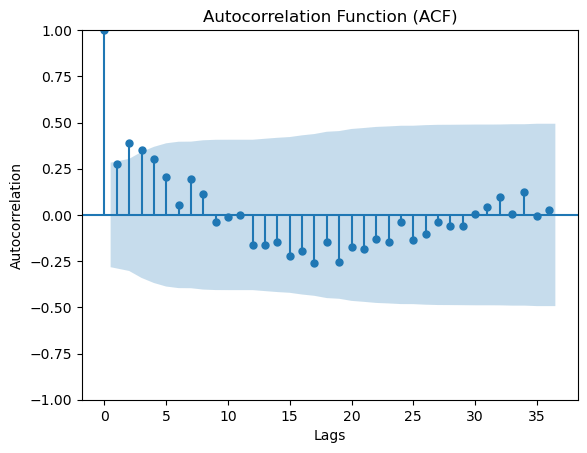

In [57]:
from statsmodels.graphics.tsaplots import plot_acf

# Load your time series data
# Example: Assuming 'data' is your time series DataFrame with a datetime index

# Plotting the ACF
plt.figure(figsize=(12, 6))
plot_acf(drug_df['value'], lags=36)  # Adjust 'value_column' to your actual value column name
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

ACF plot is sometimes known as a correlogram.i.e correlations at different lags

**check later trends and seasonality in acf plots**

**Trends and Seasonilty in AC**
- when data have a trend, the autocorrelations for small lags tend to be large and positive
- when data are seasonal the autocorrelation will be be larger at the the seasonal lags (i.e. multiples of seasonal frequency)

- when data are trended and seasonal, you see combinatioin of these effects


## 2.9 White Noise

- White Noise refers to a time series that exhibits random, uncorrelated values with constant mean and variance. 
- In essence, there is no discernible pattern, trend, or structure in the data, making it unpredictable. 
- White noise is commonly used as a baseline for comparison in time series analysis to check if any meaningful pattern or signal exists in the data.


**Key Characteristics of White Noise**

1. **Mean of Zero**: The average of all values in the white noise series is zero (or constant if the mean is not zero).
2. **Constant Variance**: The variance is constant over time, meaning the spread or dispersion of the values remains the same throughout the series.
3. **No Autocorrelation**: White noise exhibits no autocorrelation; values are completely uncorrelated. This means the value at any time point has no dependence on previous or future values.
4. **Normally Distributed**: White noise values are often assumed to be normally distributed (though this is not a strict requirement).

**Importance of White Noise in Time Series Analysis**

1. **Baseline for Comparison**: White noise is often used as a null hypothesis in time series analysis. If a time series exhibits white noise characteristics, it indicates that the series cannot be modeled with standard techniques (ARIMA, etc.), as there is no signal to predict.
   
2. **Model Residuals**: After fitting a time series model (like ARIMA or exponential smoothing), the residuals (errors) should ideally resemble white noise. If the residuals are not white noise, it suggests that the model has failed to capture some pattern or structure in the data.

3. **Testing for Stationarity**: One common way to test for stationarity is to check if a series is white noise, as white noise is stationary by definition.



### ACF of White Noise

- The autocorrelation function (ACF) of white noise should show no significant correlations at any lag except lag 0 (the present value), where the autocorrelation is 1 (perfect correlation with itself). 
- If you plot the ACF for white noise, all values outside the confidence interval should hover around zero.



# 3. Time Series Decomposition

## 3.1 Transformation and Adjustments

### 3.1.1 Calender Adjustments

- if we are studying totally monthly sales in a retail store, there will be variation between the months because of different number of trading days in each month. 
- Its easy to remove these variation by average sales per day in each month, rather than total sales in the month

### 3.1.2 Population Adjustments 

- Any data that are affected by population changes can be adjusted to give per-capita data. That is, consider the data per person (or per thousand people, or per million people) rather than the total

### 3.1.3 Inflation Adjustments

- Data which are affected by the value of money are best adjusted before modelling. 
- For example, the average cost of a new house will have increased over the last few decades due to inflation.

### 3.1.4 Mathematical Transformation

- If the data shows variation that increases or decreases with the level of the series, then a transformation can be useful
  - **Logarithmic Transformation**
  - **Power Transformation** i.e. Square roots, Cube Roots
  - **Box Cox Transformation** i.e. includes both log and power transformations

## 3.2 Time Series Components 

- To break down a time series into its components (trend, seasonality, and residuals), you can use the seasonal decomposition function from the statsmodels library in Python. 
- The most common method used is Seasonal Decomposition of Time Series (STL), which decomposes the series into the following components:

   - Trend: The long-term movement in the time series data.
   - Seasonality: The repeating short-term cycle in the series.
   - Residual: The remaining part of the series once the trend and seasonality are removed, also known as noise or irregularity.

- STL stands for Seasonal and Trend decomposition using Loess.

/var/folders/hv/fpj__r2d4ps_tm_hj2xky8x80000gn/T/ipykernel_1578/1245309168.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ts_data = pd.Series([i + (i*0.1)*pd.np.sin(i) for i in range(len(date_rng))], index=date_rng)


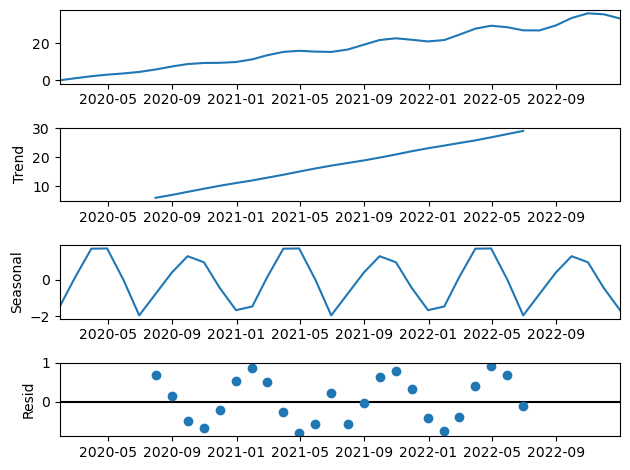

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample time series data
# Make sure the 'date' column is parsed as datetime and set as index
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')
ts_data = pd.Series([i + (i*0.1)*pd.np.sin(i) for i in range(len(date_rng))], index=date_rng)

# Decompose the time series
decomposition = seasonal_decompose(ts_data, model='additive', period=12)

# Plot the components
decomposition.plot()
plt.show()


Breakdown of the Code:
- seasonal_decompose(): Decomposes the time series into trend, seasonal, and residual components.

  - model='additive': Indicates that the time series has an additive structure (observed = trend + seasonal + residual). 
     - You can change it to 'multiplicative' if you think the time series has a multiplicative structure (observed = trend * seasonal * residual).
   - period=12: Defines the frequency of the seasonality. Here, it's monthly data, so the period is set to 12 (for yearly seasonality).

- Plotting the decomposition: decomposition.plot() plots the original data, trend, seasonal, and residual components.

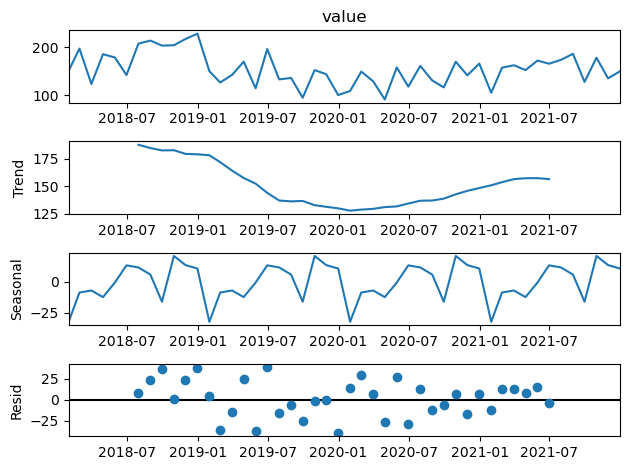

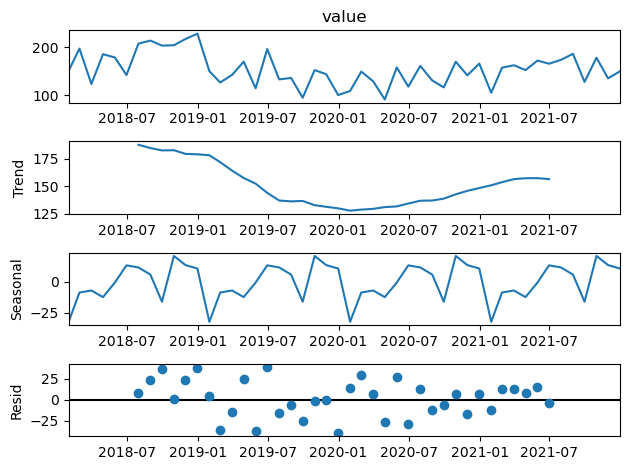

In [69]:
# lets try in real data


# Ensure the 'date' column is in the correct datetime format
drug_df['date'] = pd.to_datetime(drug_df['date'])

# Set 'date' column as the index
drug_df.set_index('date', inplace=True)

# Check if the data has a regular frequency, for example, monthly
drug_df = drug_df.asfreq('M') # asfreq('M'): Sets the frequency to monthly (you can adjust if the data is weekly, daily, etc.).

# Perform seasonal decomposition (Additive Model)
drug_decomposition = seasonal_decompose(drug_df['value'], 
                                        model='additive', 
                                        period=12)

# Plot the decomposition
drug_decomposition.plot()

## 3.3  Moving Averages -----


### 3.3.1 Moving Average

- A moving average is a statistical technique **used to smooth out short-term fluctuations in time series data to highlight long-term trends**. 
- It calculates the average of different subsets of the complete dataset.
- the average eliminates some of the randomness in the data, leaving a smooth trend-cycle component. We call this an  **m-MA**, meaning a moving average of order m

- it helps in
  - smoothing data
  - detecting trends
  - reducing noise

In [70]:
# Importing necessary libraries
import pandas as pd

# Creating a sample dataframe
data = {'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

df = pd.DataFrame(data)

# Calculate a simple moving average (window = 3)
df['SMA'] = df['value'].rolling(window=3).mean()
print(df)


        date  value   SMA
0 2023-01-01     10   NaN
1 2023-01-02     20   NaN
2 2023-01-03     30  20.0
3 2023-01-04     40  30.0
4 2023-01-05     50  40.0
5 2023-01-06     60  50.0
6 2023-01-07     70  60.0
7 2023-01-08     80  70.0
8 2023-01-09     90  80.0
9 2023-01-10    100  90.0


### 3.3.2 Moving Average of Moving Average

- This involves applying a moving average to an already calculated moving average. 
- It provides a double-smoothened version of the data.

In [71]:
# Calculate the first moving average (window=3)
df['SMA'] = df['value'].rolling(window=3).mean()

# Calculate the moving average of the moving average (window=2)
df['SMA_of_SMA'] = df['SMA'].rolling(window=2).mean()
print(df)


        date  value   SMA  SMA_of_SMA
0 2023-01-01     10   NaN         NaN
1 2023-01-02     20   NaN         NaN
2 2023-01-03     30  20.0         NaN
3 2023-01-04     40  30.0        25.0
4 2023-01-05     50  40.0        35.0
5 2023-01-06     60  50.0        45.0
6 2023-01-07     70  60.0        55.0
7 2023-01-08     80  70.0        65.0
8 2023-01-09     90  80.0        75.0
9 2023-01-10    100  90.0        85.0


In [74]:
# Compute the rolling mean, shift it up to avoid NaN
df['SMA_t_3'] = df['value'].rolling(window=3).mean().shift(-2)
df

,date,value,SMA,SMA_of_SMA,SMA_t_3
0,2023-01-01,10,NaN,NaN,20.0
1,2023-01-02,20,NaN,NaN,30.0
2,2023-01-03,30,20.0,NaN,40.0
3,2023-01-04,40,30.0,25.0,50.0
4,2023-01-05,50,40.0,35.0,60.0
5,2023-01-06,60,50.0,45.0,70.0
6,2023-01-07,70,60.0,55.0,80.0
7,2023-01-08,80,70.0,65.0,90.0
8,2023-01-09,90,80.0,75.0,NaN
9,2023-01-10,100,90.0,85.0,NaN


- Moving Average of Moving Average is helpful in making more stable, trend-focused predictions by emphasizing the longer-term patterns and reducing the impact of short-term volatility.

**When to Use It**:
- **For Long-Term Forecasting**: If your goal is to make long-term forecasts and you’re less concerned with short-term fluctuations.
- **When Data is Noisy**: In scenarios where the data is highly volatile, a double moving average can help remove the noise and reveal the actual trend.

### 3.3.3 Weighted Moving Average

A weighted moving average assigns more importance (weight) to recent observations, which helps in capturing recent trends more effectively. Weights decrease as you move backward in the data.

In [75]:
# Weights for WMA (example for a window of 3)
weights = [0.5, 0.3, 0.2]

# Weighted moving average calculation
df['WMA'] = df['value'].rolling(window=3).apply(lambda x: np.dot(x, weights), raw=True)
print(df)

        date  value   SMA  SMA_of_SMA  SMA_t_3   WMA
0 2023-01-01     10   NaN         NaN     20.0   NaN
1 2023-01-02     20   NaN         NaN     30.0   NaN
2 2023-01-03     30  20.0         NaN     40.0  17.0
3 2023-01-04     40  30.0        25.0     50.0  27.0
4 2023-01-05     50  40.0        35.0     60.0  37.0
5 2023-01-06     60  50.0        45.0     70.0  47.0
6 2023-01-07     70  60.0        55.0     80.0  57.0
7 2023-01-08     80  70.0        65.0     90.0  67.0
8 2023-01-09     90  80.0        75.0      NaN  77.0
9 2023-01-10    100  90.0        85.0      NaN  87.0


- the major advantage of weighted moving averages lies in their ability to provide a smoother and more responsive estimate of the trend-cycle in a time series.
- By applying gradually changing weights to observations, they reduce the impact of noise and abrupt changes while maintaining a focus on recent data. 
- This makes them particularly useful in forecasting and trend analysis, where accurate and timely insights are crucial.

## 3.4 Classical Decomposition: Additive vs. Multiplicative Models

**Classical decomposition** is a statistical method used to break down a time series into its components: trend, seasonality, and residual. This helps in understanding the underlying patterns and making more accurate forecasts.

 - There are two main approaches to classical decomposition: additive and multiplicative.

**Additive Model**
In an additive model, the time series is assumed to be the sum of its components:

Y(t) = T(t) + S(t) + R(t)
where:

- Y(t) is the observed value at time t
- T(t) is the trend component
- S(t) is the seasonal component
- R(t) is the residual component

This model is suitable when the seasonal fluctuations are relatively constant over time, regardless of the level of the series.

**Multiplicative Model**
In a multiplicative model, the time series is assumed to be the product of its components:

Y(t) = T(t) * S(t) * R(t)
- This model is suitable when the seasonal fluctuations increase or decrease proportionally with the level of the series. 
- For example, if sales increase by 10% in a particular season, the absolute increase in sales will be larger for higher levels of the series.

**Choosing the Right Model**
- To determine whether an additive or multiplicative model is appropriate, you can examine the relationship between the seasonal fluctuations and the level of the series. 
  - **If the seasonal fluctuations appear to be relatively constant over time, an additive model is likely suitable**. 
  - **If the seasonal fluctuations seem to increase or decrease proportionally with the level of the series, a multiplicative model is more appropriate**.

Note: In practice, it's often helpful to try both models and compare the results to see which one provides a better fit for the data.

## 3.5 Methods used by official Statistics Agencies

- **X-11 and SEATS** are two popular statistical methods used for time series decomposition, which involves breaking down a time series into its trend, seasonal, and cyclical components.
- used by offical statistcal agencies

**X-11**
- Developed by: U.S. Census Bureau
- Key Features:
  - Iterative process that applies moving averages to identify and remove trend and seasonal components.
  - Can handle both additive and multiplicative seasonal patterns.
  - Provides diagnostics for assessing the quality of the decomposition.
- Common Applications: Economic forecasting, analysis of seasonal patterns in sales data, and quality control.

- highly robust to outliers and level shifts in the time series.

**SEATS (Seasonal and Trend Estimation and Decomposition)**
- Developed by: Statistics Netherlands
- Key Features:
  - Based on state-space modeling, which provides a more flexible framework for modeling time series.
  - Can handle a wider range of seasonal patterns, including those with changing period or amplitude.
  - Offers more advanced diagnostics and outlier detection capabilities.
- Common Applications: Similar to X-11, but may be preferred for more complex time series or when greater flexibility is needed

### Comparison of X-11 and SEATS

| Feature                | X-11                       | SEATS                        |
|-----------------------|---------------------------|------------------------------|
| **Methodology**       | Moving averages            | State-space modeling         |
| **Seasonal patterns** | Additive and multiplicative | Wider range of patterns      |
| **Diagnostics**       | Basic                      | More advanced                |
| **Flexibility**       | Moderate                   | High                         |


## 3.6 STL Decomposition 

- STL Decomposition: Seasonal-Trend Decomposition using Loess
- STL (Seasonal-Trend Decomposition using Loess) is a robust method for time series decomposition that combines the flexibility of LOESS (Locally Estimated Scatterplot Smoothing) with the ability to handle additive and multiplicative seasonal patterns.

- **Key Features of STL**
   - **Robustness**: STL is less sensitive to outliers in the data compared to traditional methods like X-11 and SEATS.
  - **Flexibility**: It can handle a wide range of seasonal patterns, including those with changing period or amplitude.
   - **Efficiency**: STL is computationally efficient, making it suitable for large datasets.

**Key Differences**

- **LOESS**: STL uses LOESS for smoothing, which provides more flexibility in capturing trends compared to traditional methods.
- **Robustness**: STL's robustness to outliers is a significant advantage over X-11 and SEATS.
- **Efficiency**: STL is generally more efficient than SEATS, especially for large datasets.

**Cons of STL Decomposition**
While STL is a powerful and versatile method for time series decomposition, it has some limitations:

- **Sensitivity to Trend Length**: The choice of trend window length can significantly affect the results. If the trend is too short, it may not capture the long-term trend accurately. If it's too long, it may miss short-term fluctuations.
- **Assumption of Additive or Multiplicative Seasonality**: STL assumes either an additive or multiplicative seasonal pattern. If the true seasonal pattern is a combination of both, the decomposition may not be accurate.
- **Difficulty in Interpreting Residuals**: The residuals from STL decomposition can be difficult to interpret, especially when the seasonal pattern is complex or the data contains outliers.
- **Limited Handling of Missing Values**: STL may struggle to handle missing values effectively, especially if they occur in clusters or at the beginning or end of the time series.

# 4. Time Series Features

## 4.2 ACF and STL Features

**ACF (Autocorrelation Function) -- -- -- -- --** 
The **Autocorrelation Function (ACF)** is a statistical tool used to measure the correlation between observations of a time series at different time lags. It provides insights into the relationships within the data across time, helping to identify patterns and periodicity.

#### Key Features of ACF:
1. **Lagged Relationships**: ACF quantifies the relationship between a time series and its lagged values, allowing us to see how past values influence current values.
2. **Identifying Seasonality**: Significant spikes in the ACF plot at regular intervals indicate seasonality in the data.
3. **Model Selection**: ACF can help determine the appropriate order for models such as ARIMA by indicating how many lags to include.
4. **Decay Patterns**: The shape of the ACF plot can indicate whether a series is stationary (decays quickly) or non-stationary (decays slowly).

**STL (Seasonal-Trend Decomposition using LOESS) -- -- -- -- --**
**STL** is a method for decomposing time series data into seasonal, trend, and residual components. It uses LOESS (Locally Estimated Scatterplot Smoothing) to provide a flexible way to capture different patterns within the data.

#### Key Features of STL:
1. **Seasonal Component**: Identifies and isolates the seasonal fluctuations in the data.
2. **Trend Component**: Captures the long-term trend in the data, smoothing out short-term fluctuations.
3. **Residual Component**: Represents the irregular or noise component after removing seasonal and trend effects.
4. **Flexibility**: STL is robust and can handle seasonal components that change over time, making it suitable for a wide range of time series data.
5. **Visualization**: The decomposition allows for easy visualization of each component, aiding in the understanding of underlying patterns in the data.

#### Summary
- **ACF** helps in understanding autocorrelation and is useful for identifying patterns and model selection.
- **STL** provides a comprehensive view of a time series by decomposing it into seasonal, trend, and residual components, aiding in analysis and forecasting. 

These features are valuable in time series analysis, allowing analysts to extract meaningful insights and improve forecasting accuracy.

# 5 Tidy Forecasting workflow

## 5.2 Simple forecasting methods

- **Mean Method**: here, the forecasts of all future value are equal to the mean of the historical data

- **Naive Method**: here , we simply set all future forecasts to the **value of last observation**
- **Seasonal Naive Method**: A similar method is useful for highly seasonal data. In this case, we set each forecast to be equal to the last observed value from the same season

- **Drift Method**: Drift forecasting is a simple method that assumes a constant rate of change (drift) in the time series. It's particularly useful when there's a clear linear trend in the data.

  - **Formula**: Forecast(t+1) = Actual(t) + Drift
  - where:
      - Forecast(t+1) is the forecasted value for the next period.
      - Actual(t) is the actual value for the current period.
      - Drift is the average change in the time series over a specified period.
      
   - **Calculating Drift**:

       - Determine the number of periods to consider: This is typically based on the length of the trend you want to capture.
      - Calculate the difference between the first and last values:    Subtract the first value from the last value.
      - Divide the difference by the number of periods: This gives you the average change per period, which is the drift.
      - If the first value in a time series is 100 and the last value after 10 periods is 150, the drift would be (150 - 100) / 10 = 5. Therefore, the forecast for the next period would be 150 + 5 = 155

## 5.3 Fitted Values and Residuals in Time Series Analysis

In time series analysis, fitted values and residuals are essential components of a model.

**Fitted Values**
 - Definition: The values predicted by a time series model for each data point.
 - Calculation: The fitted values are obtained by applying the model's equation to the historical data.
- Purpose: They represent the model's best estimate of the true values based on the observed data.


**Residuals**
 - Definition: The differences between the actual values and the corresponding fitted values.
- Calculation: Residuals are calculated by subtracting the fitted values from the actual values.
- Purpose: They measure the model's ability to fit the data. Small residuals indicate a good fit, while large residuals suggest a poor fit.

**Relationship between Fitted Values and Residuals**:

- Sum of residuals: In a well-specified model, the sum of residuals should be close to zero.
- Correlation between fitted values and residuals: Ideally, there should be no correlation between the fitted values and the residuals.  - If there is a correlation, it suggests that the model is not capturing some important pattern in the data.

**Uses of Fitted Values and Residuals:

- Model evaluation: Residuals are used to assess the model's goodness of fit and identify potential problems, such as outliers or autocorrelation.
- Forecasting: Fitted values can be used to make predictions for future time periods.
- Diagnostics: Residual plots can help identify patterns in the data that may not have been captured by the model.
- Example: Consider a simple linear regression model for a time series:

    - Y(t) = a + bt + e(t)
      - where:
       - Y(t) is the actual value at time t
       - a is the intercept
       - b is the slope
       - t is time
       - e(t) is the error term (residual)
   - The fitted values would be calculated using the estimated values of a and b for each time point. The residuals would be the differences between the actual values and the fitted values.



# 8. Exponential Smoothing

### -- -- -- -- --
Understanding Trend and Level in Time Series Analysis
Trend and level are two fundamental components of a time series. They help describe the underlying patterns in the data.

**Level**
- Definition: The level represents the overall value or magnitude of the time series at a particular point in time.
- Interpretation: It's like the baseline or average value around which the series fluctuates.
- Example: In sales data, the level might represent the average monthly sales volume.


**Trend**
- Definition: The trend is the general direction or pattern in which the data is moving over time.
- Interpretation: It's like the slope of the line that best fits the data.
- Example: If sales are increasing each month, there's an upward trend.


**Relationship between Level and Trend**:

- Level changes: A trend indicates that the level of the time series is changing.
- Trend direction: The direction of the trend (upward, downward, or stable) determines how the level is changing.


**To visualize the relationship**:

Imagine a line graph:
- The y-axis represents the level (the magnitude of the data).
- The x-axis represents time.
- The slope of the line indicates the trend.
Example:

- If a company's sales are increasing steadily over time, the level of sales is rising, and there's an upward trend.

**In essence, the level is the "where" of the data, while the trend is the "which way" it's moving**.

#### -- -- -- -- --

**Exponential Smoothing** is a popular technique used in time series forecasting, especially when dealing with data that exhibits trends or seasonality. It gives more weight to recent observations while still considering past data, making it responsive to changes over time.

#### Key Types of Exponential Smoothing:

1. **Simple Exponential Smoothing (SES)**:
   - Suitable for data without a trend or seasonality.
   - Formula:  
      - **"Forecast for period t+1 = α * Actual value for period t + (1-α) * Forecast for period t"**
   - **Use Case**: When data fluctuates around a constant level.
   
   - When dealing with the first value forecast in exponential smoothing, we encounter a situation where there's no previous forecast to reference. To address this, we typically use one of two methods:
     - Navie Forecast: The forecast for the first period is equal to the actual value for the first period.
     - Initial Level: Set the intial forecast equal to a specific value (often the average of the initial data points i.e. first and second value)

2. **Double Exponential Smoothing (Holt's Linear Trend Method)**:
   - Suitable for data with a trend.
   - It incorporates a trend component in addition to the level component. The formulas are:
   - Formula for Level Component:  
        - **Level for period t+1 = α * Actual value for period t + (1-α) * (Level for period t + Trend for period t)**
   - Formula for Trend Component
        - **Trend for period t+1 = β * (Level for period t+1 - Level for period t) + (1-β) * Trend for period t**
   

3. **Triple Exponential Smoothing (Holt-Winters Method)**:
   - Suitable for data with both trend and seasonality.
   - Adds a seasonal component to the level and trend updates.
   - Formula Level Component
       - **Level for period t+1 = α * Actual value for period t + (1-α) * (Level for period t + Trend for period t + Seasonal component for period t-s)**
   - Formula for Trend Component
      - **Trend for period t+1 = β * (Level for period t+1 - Level for period t) + (1-β) * Trend for period t**
   
   - Formula for Seasonal Component
      - **Seasonal component for period t+1 = γ * (Actual value for period t - Level for period t - Trend for period t) + (1-γ) * Seasonal component for period t-s**
   
   - Here, s is the period of the seasonality. For example, if the data is seasonal with a period of 12 (monthly data), s would be 12.
#### Key Features:
- **Recent Data Emphasis**: Recent observations are weighted more heavily, making the model more reactive to recent changes.
- **Smoothing Factor**: Controls how quickly the influence of older data diminishes.
- **Handles Trends and Seasonality**: More advanced forms (double and triple) allow modeling of both trends and seasonality, making exponential smoothing highly versatile.

#### When to Use:
- **Simple Exponential Smoothing**: Use when the data shows no trend or seasonality.
- **Holt’s Linear Trend**: Use when the data shows a trend but no seasonality.
- **Holt-Winters Method**: Use when the data shows both trend and seasonality.

Exponential smoothing is widely used because of its simplicity, ease of implementation, and effectiveness in forecasting a variety of time series data.

**Simple Exponential Smoothing**:

- Additive: Forecast_t+1 = Level_t + α * (Actual_t - Level_t)
- Multiplicative: Forecast_t+1 = Level_t * (1 + α * (Actual_t / Level_t - 1))


**Double Exponential Smoothing**:

- Additive:
   - Level_t+1 = Level_t + Trend_t + α * (Actual_t - Level_t - Trend_t)
   - Trend_t+1 = Trend_t + β * (Actual_t - Level_t - Trend_t)
- Multiplicative:
   - Level_t+1 = Level_t * (1 + α * (Actual_t / Level_t - 1))
   - Trend_t+1 = Trend_t * (1 + β * (Actual_t / Level_t - 1))


**Triple Exponential Smoothing**:

  - Additive:
     - Level_t+1 = Level_t + Trend_t + Seasonal_t + α * (Actual_t -  Level_t - Trend_t - Seasonal_t)
      - Trend_t+1 = Trend_t + β * (Actual_t - Level_t - Trend_t - Seasonal_t)
      - Seasonal_t+1 = Seasonal_t-s + γ * (Actual_t - Level_t - Trend_t - Seasonal_t-s)
  - Multiplicative:
    - Level_t+1 = Level_t * (1 + α * (Actual_t / Level_t - 1))
    - Trend_t+1 = Trend_t * (1 + β * (Actual_t / Level_t - 1))
    - Seasonal_t+1 = Seasonal_t-s * (1 + γ * (Actual_t / (Level_t * Trend_t * Seasonal_t-s) - 1))


**Choosing the Right Model**:

- Additive: Suitable when components have a linear relationship.
- Multiplicative: Suitable when components interact multiplicatively (e.g., percentage increases or decreases).

- Different types of Exponential smoothing, w.r.t **Trend and Seasonal**

| Trend Component   | Seasonal Component | N (None) | A (Additive) | M (Multiplicative) |
|-------------------|--------------------|----------|--------------|--------------------|
| N (None)          |                    | (N,N)    | (N,A)        | (N,M)              |
| A (Additive)      |                    | (A,N)    | (A,A)        | (A,M)              |
| A<sub>d</sub> (Additive damped) |    | (A<sub>d</sub>,N) | (A<sub>d</sub>,A) | (A<sub>d</sub>,M) |


| Short hand | Method                                |
|------------|---------------------------------------|
| (N,N)      | Simple exponential smoothing          |
| (A,N)      | Holt’s linear method                  |
| (A<sub>d</sub>,N) | Additive damped trend method   |
| (A,A)      | Additive Holt-Winters’ method         |
| (A,M)      | Multiplicative Holt-Winters’ method   |
| (A<sub>d</sub>,M) | Holt-Winters’ damped method    |
